In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima
from scipy.stats import norm

In [2]:
symbols = ['AAPL', 'ABT', 'ACN', 'ADBE', 'ADP', 'AMGN', 'AMZN', 'AXP', 'BA']

stock_prices_2 = (
    yf.Tickers(symbols)
    .history(period="max", start="2013-01-01")
    .Close
    .resample('1d')
    .ffill()
)

stock_returns_2 = stock_prices_2.rolling(5).mean().pct_change().dropna()

stock_returns_2

[*********************100%***********************]  9 of 9 completed


Ticker,AAPL,ABT,ACN,ADBE,ADP,AMGN,AMZN,AXP,BA
Date,,,,,,,,,
2013-01-07 00:00:00+00:00,-0.009405,0.007841,-0.000492,-0.002100,0.001766,-0.001394,0.008622,0.003743,-0.002425
2013-01-08 00:00:00+00:00,-0.006343,0.000482,0.001390,0.002052,0.002136,-0.000991,0.006056,0.004031,-0.008638
2013-01-09 00:00:00+00:00,-0.003764,0.003014,0.001706,0.002783,-0.000135,-0.000699,0.005487,0.002175,-0.002426
2013-01-10 00:00:00+00:00,-0.001332,0.004688,-0.000058,0.002565,0.000609,-0.002639,0.004691,0.003939,-0.001569
2013-01-11 00:00:00+00:00,-0.002560,0.002623,0.001992,-0.000209,0.000947,-0.004569,0.006631,0.005420,-0.006626
...,...,...,...,...,...,...,...,...,...
2024-11-15 00:00:00+00:00,-0.001736,-0.001188,-0.001085,0.003358,-0.004637,-0.027001,-0.005307,-0.000505,-0.015872
2024-11-16 00:00:00+00:00,0.000683,-0.001552,-0.002068,-0.000427,-0.006006,-0.025439,-0.004052,-0.004224,-0.012310
2024-11-17 00:00:00+00:00,0.000683,-0.000933,-0.003911,-0.008881,-0.006789,-0.010407,-0.006059,-0.001140,-0.007077


In [3]:
train_data = stock_returns_2.iloc[:int(0.7 * len(stock_returns_2))]
test_data = stock_returns_2.iloc[int(0.7 * len(stock_returns_2)):]

In [10]:
print(train_data['AAPL'])

Date
2013-01-07 00:00:00+00:00   -0.009404
2013-01-08 00:00:00+00:00   -0.006343
2013-01-09 00:00:00+00:00   -0.003764
2013-01-10 00:00:00+00:00   -0.001332
2013-01-11 00:00:00+00:00   -0.002560
                               ...   
2021-04-23 00:00:00+00:00    0.000240
2021-04-24 00:00:00+00:00   -0.000779
2021-04-25 00:00:00+00:00    0.001814
2021-04-26 00:00:00+00:00    0.001825
2021-04-27 00:00:00+00:00    0.003659
Freq: D, Name: AAPL, Length: 3033, dtype: float64


In [5]:
print(test_data['AAPL'].index[-60])

2024-09-15 00:00:00+00:00


In [4]:
predictions_arima = []

# Generate predictions for each stock symbol
for symbol in symbols[:9]:
    arima_model = ARIMA(test_data[symbol], order=(1, 0, 5))  # ARIMA(p,d,q)
    arima_model_fit = arima_model.fit()

    forecast = arima_model_fit.predict(start=len(test_data[symbol]) - 60, end=len(test_data[symbol]) - 1)
    predictions_arima.append(forecast)

print(predictions_arima)



/home/abizard/miniconda3/envs/finetuning/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/abizard/miniconda3/envs/finetuning/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/abizard/miniconda3/envs/finetuning/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abizard/miniconda3/envs/finetuning/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

[Date
2024-09-21 00:00:00+00:00    0.008676
2024-09-22 00:00:00+00:00    0.009912
2024-09-23 00:00:00+00:00    0.007385
2024-09-24 00:00:00+00:00   -0.000608
2024-09-25 00:00:00+00:00   -0.000769
2024-09-26 00:00:00+00:00   -0.002759
2024-09-27 00:00:00+00:00   -0.000631
2024-09-28 00:00:00+00:00    0.001256
2024-09-29 00:00:00+00:00    0.001475
2024-09-30 00:00:00+00:00    0.001028
2024-10-01 00:00:00+00:00    0.004103
2024-10-02 00:00:00+00:00   -0.001587
2024-10-03 00:00:00+00:00   -0.000665
2024-10-04 00:00:00+00:00   -0.000528
2024-10-05 00:00:00+00:00   -0.004404
2024-10-06 00:00:00+00:00   -0.001161
2024-10-07 00:00:00+00:00    0.000082
2024-10-08 00:00:00+00:00   -0.003471
2024-10-09 00:00:00+00:00    0.000592
2024-10-10 00:00:00+00:00    0.003159
2024-10-11 00:00:00+00:00    0.000169
2024-10-12 00:00:00+00:00    0.004065
2024-10-13 00:00:00+00:00    0.002386
2024-10-14 00:00:00+00:00    0.000004
2024-10-15 00:00:00+00:00    0.002372
2024-10-16 00:00:00+00:00    0.003630
2024-1

/home/abizard/miniconda3/envs/finetuning/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/tmp/ipykernel_5588/2139374613.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/tmp/ipykernel_5588/2139374613.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/tmp/ipykernel_5588/2139374613.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/tmp/ipykernel_5588/2139374613.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
/tmp/ipykernel_5588/2139374613.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of t

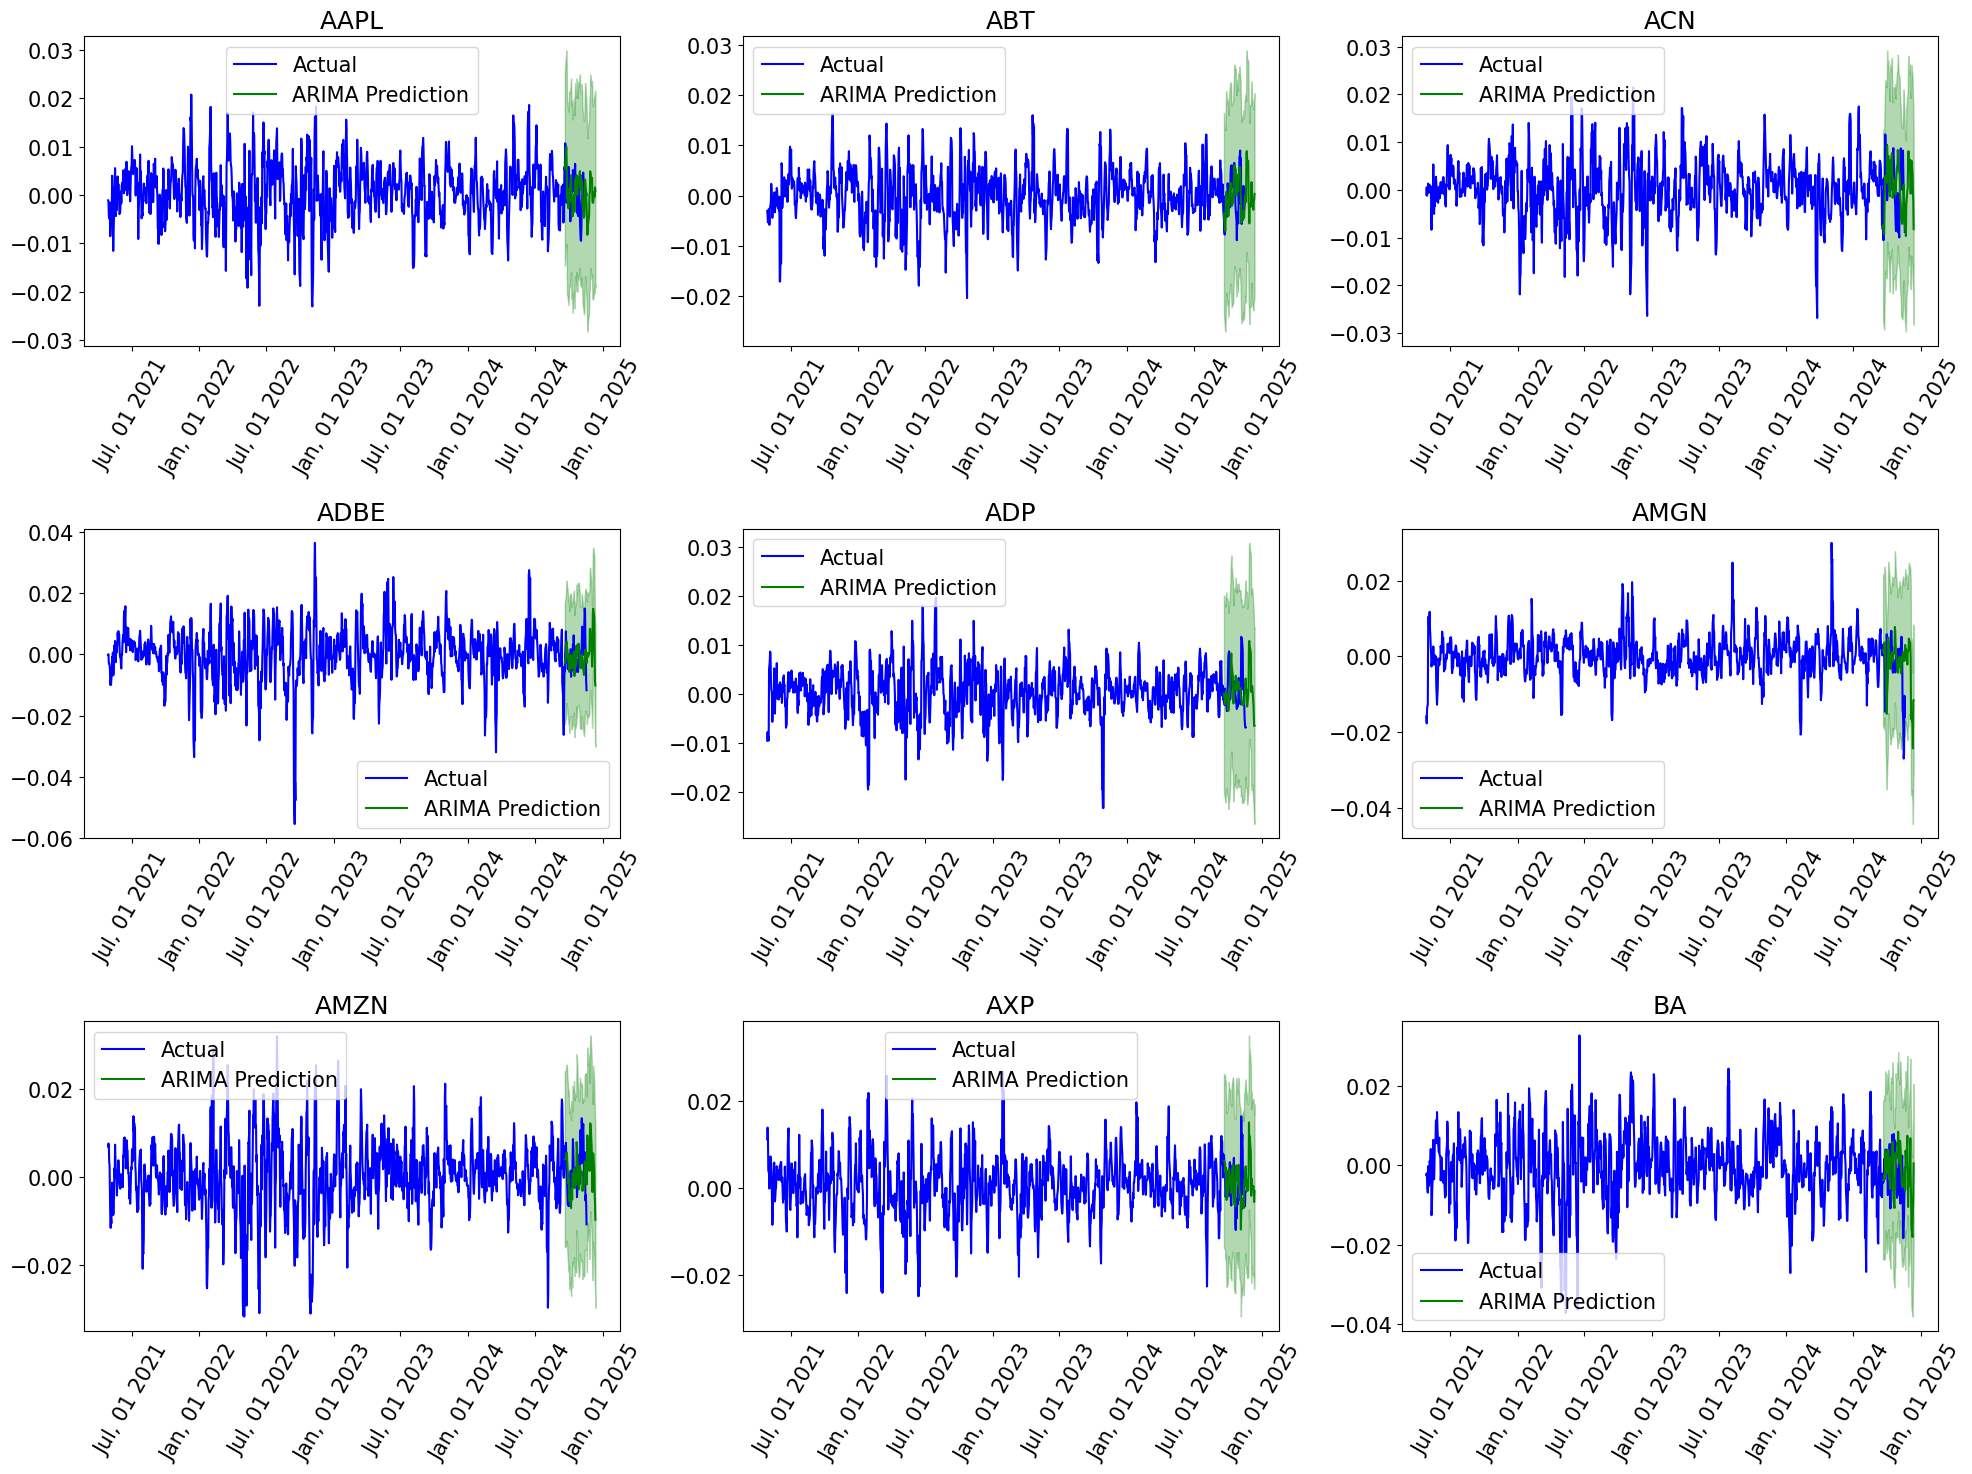

In [39]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter("%b, %d %Y")
plt.rcParams.update({"font.size": 15})

# iterate through the series, plot the predicted samples
for idx, symbol in enumerate(symbols[:9]):
    ax = plt.subplot(3, 3, idx + 1)

    # Plotting the actual data (test_data) for the full period
    ax.plot(test_data[symbol].index, test_data[symbol], label='Actual', color='blue')

    # Plotting the ARIMA predictions for the next 60 days
    forecast_dates = pd.date_range(start=test_data[symbol].index[-60], periods=60, freq='B')
    # forecast_dates = test_data[symbol].index[-60:]# Corresponding dates for forecast
    ax.plot(forecast_dates, predictions_arima[idx], label='ARIMA Prediction', color='green')

    ax.fill_between(forecast_dates, np.array(predictions_arima[idx]) - 0.02, np.array(predictions_arima[idx]) + 0.02, color='green', alpha=0.3)

    ax.set_title(symbol)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    # ax.set_xlim(pd.Timestamp('2024-04-01'), pd.Timestamp('2024-11-08'))
    ax.legend()

plt.tight_layout()
plt.show()

AAPL - MSE: 0.000028, MAPE: 4.912050
ABT - MSE: 0.000025, MAPE: 4.166053
ACN - MSE: 0.000040, MAPE: 6.104442
ADBE - MSE: 0.000044, MAPE: 4.762775
ADP - MSE: 0.000041, MAPE: 4.006339
AMGN - MSE: 0.000097, MAPE: 15.321627
AMZN - MSE: 0.000023, MAPE: 1.668414
AXP - MSE: 0.000048, MAPE: 9.452659
BA - MSE: 0.000066, MAPE: 2.306335


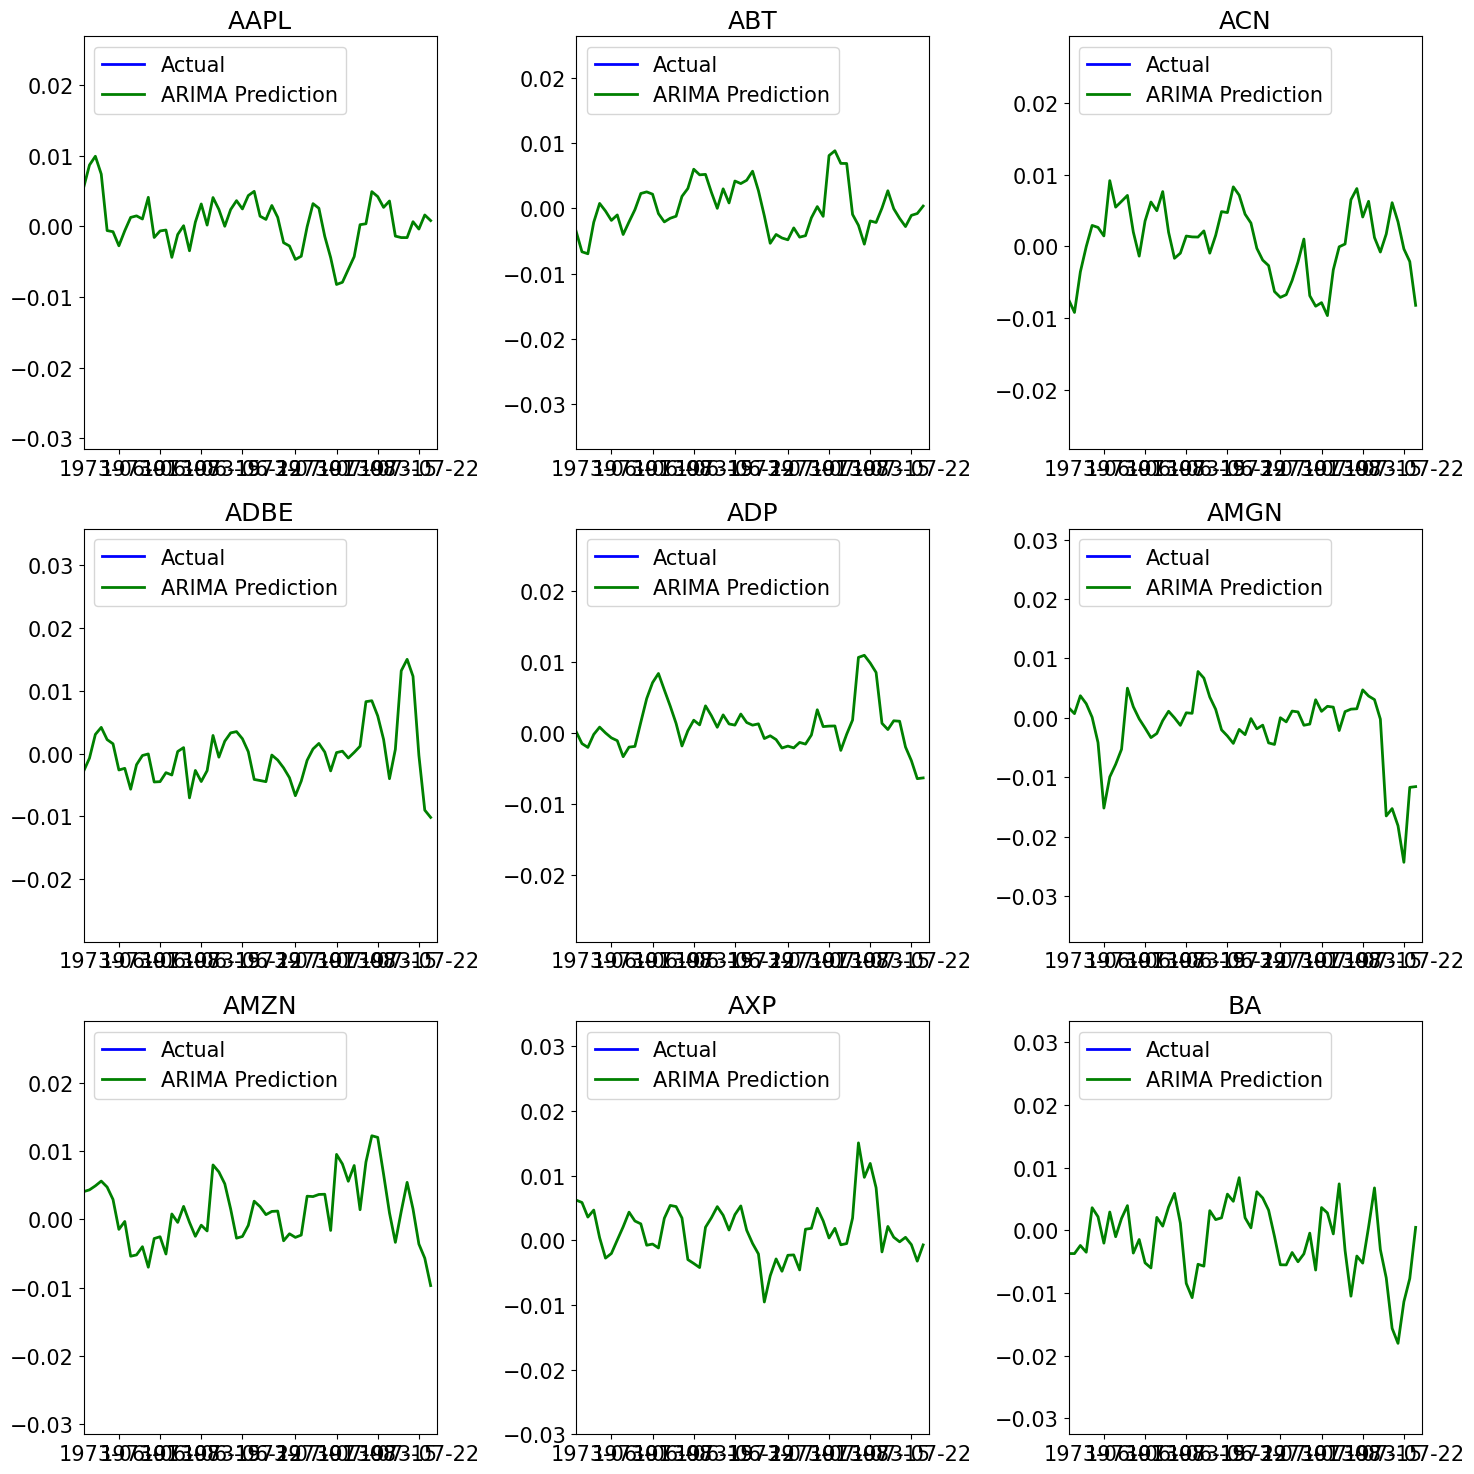


Average MSE: 4.5636353036462146e-05
Average MAPE: 5.855632696765593


In [40]:
mse_list = []
mape_list = []

for i, symbol in enumerate(symbols[:9]):
    actual_values = test_data[symbol][:60].values  # Data aktual untuk 60 hari
    predicted_values = predictions_arima[i]  # Prediksi ARIMA untuk 60 hari

    # Menghitung MSE dan MAPE
    mse = mean_squared_error(actual_values, predicted_values)
    mape = mean_absolute_percentage_error(actual_values, predicted_values)

    mse_list.append(mse)
    mape_list.append(mape)

    # Menampilkan hasil MSE dan MAPE untuk simbol saham
    print(f'{symbol} - MSE: {mse:.6f}, MAPE: {mape:.6f}')

# Menampilkan grafik hasil prediksi vs aktual
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, symbol in enumerate(symbols[:9]):
    axes[i].plot(test_data[symbol][:60], label='Actual', color='blue', lw=2)
    axes[i].plot(range(len(test_data[symbol]) - 60, len(test_data[symbol])), predictions_arima[i], label='ARIMA Prediction', color='green', lw=2)
    # axes[i].fill_between(range(len(test_data[symbol]) - 60, len(test_data[symbol])), predictions_arima[i] - 0.02, predictions_arima[i] + 0.02, color='green', alpha=0.3)
    axes[i].set_title(symbol)
    axes[i].legend(loc='upper left')
    axes[i].set_xlim(len(test_data[symbol]) - 60, len(test_data[symbol]))
    axes[i].set_ylim(test_data[symbol][:60].min() - 0.02, test_data[symbol][:60].max() + 0.02)

plt.tight_layout()
plt.show()

# Menampilkan rata-rata MSE dan MAPE
print("\nAverage MSE:", np.mean(mse_list))
print("Average MAPE:", np.mean(mape_list))

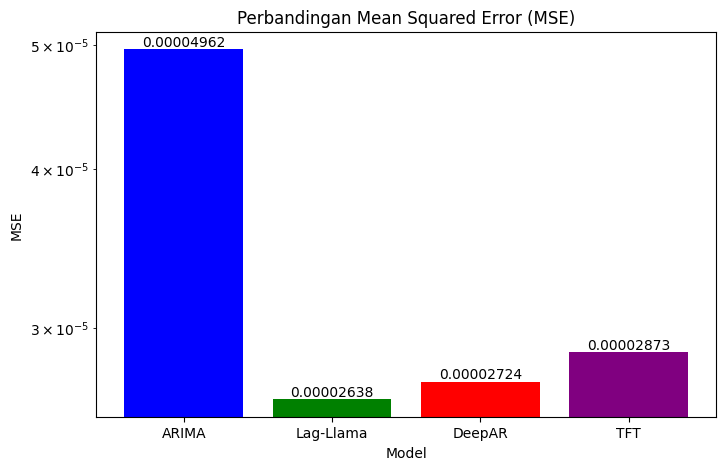

In [3]:
hasil_msee = {
    'ARIMA' : 0.0000496185,
    'Lag-Llama' : 0.0000263849,
    'DeepAR' : 0.0000272404,
    'TFT' : 0.0000287272
}

colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 5))
bars = plt.bar(list(hasil_msee.keys()), list(hasil_msee.values()), color=colors)
plt.title('Perbandingan Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.yscale('log')  # Log scale for better visualization of small values

# Adding MSE values to the top of each bar
for bar, value in zip(bars, hasil_msee.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.8f}', va='bottom', ha='center')

plt.show()

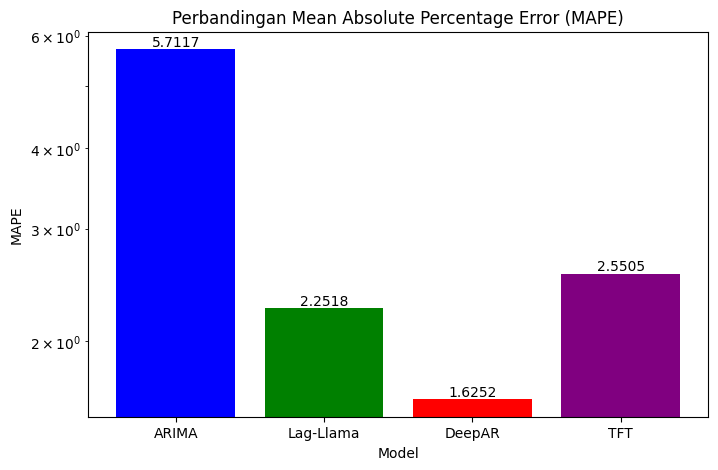

In [5]:
hasil_mape = {
    'ARIMA' : 5.7117,
    'Lag-Llama' : 2.2518,
    'DeepAR' : 1.6252,
    'TFT' : 2.5505
}

colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 5))
bars = plt.bar(list(hasil_mape.keys()), list(hasil_mape.values()), color=colors)
plt.title('Perbandingan Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.yscale('log')  # Log scale for better visualization of small values

# Adding MSE values to the top of each bar
for bar, value in zip(bars, hasil_mape.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}', va='bottom', ha='center')

plt.show()

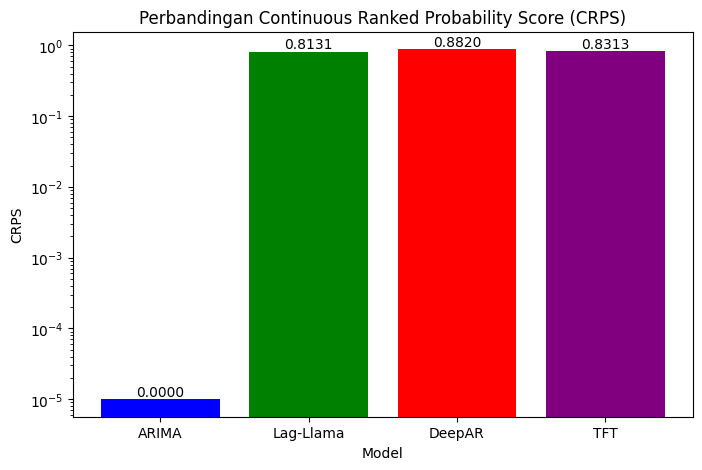

In [12]:
import matplotlib.pyplot as plt

# Hasil CRPS untuk berbagai model
hasil_crps = {
    'ARIMA': 0.0,
    'Lag-Llama': 0.81309,  # Nilai 0 bisa menyebabkan masalah di log scale
    'DeepAR': 0.88195,
    'TFT': 0.83132
}

# Modifikasi nilai 0.0 dengan angka kecil untuk menghindari error
modified_crps = {k: (v if v > 0 else 1e-5) for k, v in hasil_crps.items()}

colors = ['blue', 'green', 'red', 'purple']

# Membuat bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(list(modified_crps.keys()), list(modified_crps.values()), color=colors)

# Menambahkan judul dan label
plt.title('Perbandingan Continuous Ranked Probability Score (CRPS)')
plt.xlabel('Model')
plt.ylabel('CRPS')
plt.yscale('log')  # Menggunakan log scale

# Menambahkan nilai MSE di atas setiap bar
for bar, value in zip(bars, modified_crps.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}', va='bottom', ha='center')

# Menampilkan plot
plt.show()
